In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",-283.29
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",-159.96
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",-154.29
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",-161.16
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",-159.23


In [4]:
# cols = ["International",'Express Shipment','Installation Included','Fragile','Remote Location']
# vals_to_replace = {'Yes':1,'No':0}
# for i in cols:
#     df[i] = df[i].map(vals_to_replace)

df.drop(['Customer Id', 'Artist Name'], axis = 1,inplace = True)

df['Customer Information'] = df['Customer Information'].map({"Working Class":1,'Wealthy':2})


df['Scheduled Date'] = pd.to_datetime(df['Scheduled Date'])
df['Delivery Date'] = pd.to_datetime(df['Delivery Date'])


df['Scheduled_month'] = df['Scheduled Date'].dt.month
df['Delivery_month'] = df['Delivery Date'].dt.month


df['Scheduled_day'] = df['Scheduled Date'].dt.day
df['Delivery_day'] = df['Delivery Date'].dt.day


df['Scheduled_Year'] = df['Scheduled Date'].dt.year
df['Delivery_Year'] = df['Delivery Date'].dt.year


#imputing missing values
df['Artist Reputation'].fillna(value=df['Artist Reputation'].mean(), inplace= True)
df['Height'].fillna(value=df['Height'].mean(), inplace= True)
df['Weight'].fillna(value=df['Weight'].mean(), inplace= True)
df['Width'].fillna(value=df['Width'].mean(), inplace= True)

In [5]:
df.Transport.fillna("Missing_Transport", inplace= True)

In [6]:
df.isna().sum()


Artist Reputation          0
Height                     0
Width                      0
Weight                     0
Material                 764
Price Of Sculpture         0
Base Shipping Price        0
International              0
Express Shipment           0
Installation Included      0
Transport                  0
Fragile                    0
Customer Information       0
Remote Location          771
Scheduled Date             0
Delivery Date              0
Customer Location          0
Cost                       0
Scheduled_month            0
Delivery_month             0
Scheduled_day              0
Delivery_day               0
Scheduled_Year             0
Delivery_Year              0
dtype: int64

In [7]:
df.drop(['Scheduled Date','Delivery Date'], axis=1, inplace=True)
df['State_Code'] = df['Customer Location'].str.split(',', expand = True)[1].str.slice(0,3)
state_code_others = df[df['State_Code'].isna()]['Customer Location'].str.split(' ',expand=True)[1]
state_code_others.index = df[df['State_Code'].isnull()].index


df.loc[df['State_Code'].isnull() , 'State_Code'] = state_code_others





In [8]:
df

,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,...,Remote Location,Customer Location,Cost,Scheduled_month,Delivery_month,Scheduled_day,Delivery_day,Scheduled_Year,Delivery_Year,State_Code
0,0.26,17.0,6.000000,4.128000e+03,Brass,13.91,16.27,Yes,Yes,No,...,No,"New Michelle, OH 50777",-283.29,6,6,7,3,2015,2015,OH
1,0.28,3.0,3.000000,6.100000e+01,Brass,6.83,15.00,No,No,No,...,No,"New Michaelport, WY 12072",-159.96,3,3,6,5,2017,2017,WY
2,0.07,8.0,5.000000,2.370000e+02,Clay,4.96,21.18,No,No,No,...,Yes,"Bowmanshire, WA 19241",-154.29,3,3,9,8,2015,2015,WA
3,0.12,9.0,9.617647,4.006948e+05,Aluminium,5.81,16.31,No,No,No,...,Yes,"East Robyn, KY 86375",-161.16,5,5,24,20,2015,2015,KY
4,0.15,17.0,6.000000,3.240000e+02,Aluminium,3.18,11.94,Yes,Yes,Yes,...,No,"Aprilside, PA 52793",-159.23,12,12,18,14,2016,2016,PA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,0.37,37.0,10.000000,1.655100e+04,Brass,28.28,38.46,Yes,Yes,No,...,Yes,"New Robert, VT 85335",872.43,3,3,28,25,2018,2018,VT
6496,0.67,15.0,9.617647,1.898100e+04,NaN,67.18,27.72,No,No,No,...,No,"New Joshua, VA 35766",1347.02,8,8,29,27,2015,2015,VA
6497,0.68,19.0,8.000000,5.870000e+02,Clay,6.92,10.38,Yes,No,No,...,No,"Lake Kelly, MA 80823",354.55,4,4,10,9,2019,2019,MA
6498,0.02,33.0,9.000000,1.269377e+06,Stone,2929.13,69.76,No,Yes,No,...,Yes,"Hintonberg, UT 35006",5037.50,3,3,10,12,2019,2019,UT


In [9]:
df.isna().sum()

Artist Reputation          0
Height                     0
Width                      0
Weight                     0
Material                 764
Price Of Sculpture         0
Base Shipping Price        0
International              0
Express Shipment           0
Installation Included      0
Transport                  0
Fragile                    0
Customer Information       0
Remote Location          771
Customer Location          0
Cost                       0
Scheduled_month            0
Delivery_month             0
Scheduled_day              0
Delivery_day               0
Scheduled_Year             0
Delivery_Year              0
State_Code                 0
dtype: int64

In [10]:
df['Material'].fillna('No Material',inplace=True)


In [11]:
df['Remote Location'].fillna('NA',inplace=True)
df.isna().sum()

Artist Reputation        0
Height                   0
Width                    0
Weight                   0
Material                 0
Price Of Sculpture       0
Base Shipping Price      0
International            0
Express Shipment         0
Installation Included    0
Transport                0
Fragile                  0
Customer Information     0
Remote Location          0
Customer Location        0
Cost                     0
Scheduled_month          0
Delivery_month           0
Scheduled_day            0
Delivery_day             0
Scheduled_Year           0
Delivery_Year            0
State_Code               0
dtype: int64

In [12]:
pd.set_option('display.max_columns', 100)


df.sample(10)

,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Customer Location,Cost,Scheduled_month,Delivery_month,Scheduled_day,Delivery_day,Scheduled_Year,Delivery_Year,State_Code
3453,0.46185,55.000000,12.0,5.281237e+06,Stone,11340.36,64.18,No,No,No,Missing_Transport,No,1,NA,"Hammondmouth, NM 45679",22497.20,7,7,18,19,2016,2016,NM
2939,0.68000,19.000000,11.0,7.340000e+02,Aluminium,5.07,22.17,Yes,Yes,Yes,Missing_Transport,No,2,No,"Lisafort, AR 87737",639.20,9,9,23,21,2015,2015,AR
2851,0.46185,46.000000,22.0,1.193440e+05,Brass,317.95,96.81,Yes,No,No,Waterways,No,1,No,FPO AP 63164,2588.76,12,12,14,17,2016,2016,AP
3633,0.46185,21.766204,6.0,4.006948e+05,Wood,4.66,19.45,Yes,Yes,Yes,Airways,No,1,No,"Hilltown, MN 15683",191.23,7,7,14,15,2016,2016,MN
5449,0.63000,16.000000,6.0,1.450000e+02,Wood,3.89,20.89,Yes,Yes,Yes,Airways,No,1,No,"Vasquezside, SD 21973",320.84,4,4,25,27,2019,2019,SD
2210,0.89000,9.000000,4.0,2.438000e+03,Stone,3.40,20.78,No,Yes,Yes,Airways,No,2,No,"Port Crystalborough, WI 41104",541.99,6,6,20,20,2019,2019,WI
5974,0.34000,41.000000,14.0,3.010000e+02,No Material,6.21,15.43,No,No,No,Missing_Transport,No,1,No,"Port Tony, WV 82814",198.00,4,4,11,8,2016,2016,WV
1215,0.47000,21.766204,7.0,8.979000e+03,Brass,12.60,90.33,Yes,Yes,No,Airways,No,2,No,"South Angela, IN 16872",1016.33,2,2,7,10,2016,2016,IN
2041,0.31000,12.000000,6.0,2.180000e+02,Aluminium,6.21,20.69,No,No,No,Roadways,No,2,Yes,"North Thomas, WY 52951",209.60,11,11,25,25,2016,2016,WY
70,0.84000,18.000000,8.0,1.038100e+04,Brass,26.10,45.79,Yes,Yes,No,Airways,No,1,No,"Lake Daniel, MD 54192",-1536.89,9,8,2,29,2015,2015,MD


In [13]:
df['Cost'] = df['Cost'].abs()
df['Cost'] = np.log(df['Cost'])

In [14]:
df.sample(3)

,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Customer Location,Cost,Scheduled_month,Delivery_month,Scheduled_day,Delivery_day,Scheduled_Year,Delivery_Year,State_Code
5140,0.07,24.000000,12.0,16410.0,Bronze,8.95,67.27,No,Yes,No,Missing_Transport,No,1,Yes,"West Michaelberg, MI 95039",6.048884,12,12,5,4,2018,2018,MI
3233,0.61,14.000000,8.0,296.0,Aluminium,4.21,12.70,Yes,Yes,Yes,Airways,No,2,No,"Port Jennifer, NE 94784",5.710857,1,1,15,15,2016,2016,NE
5405,0.98,21.766204,6.0,1340.0,No Material,7.79,19.64,Yes,No,No,Missing_Transport,Yes,1,No,"New Robertfurt, MI 75887",7.283812,6,6,11,10,2016,2016,MI


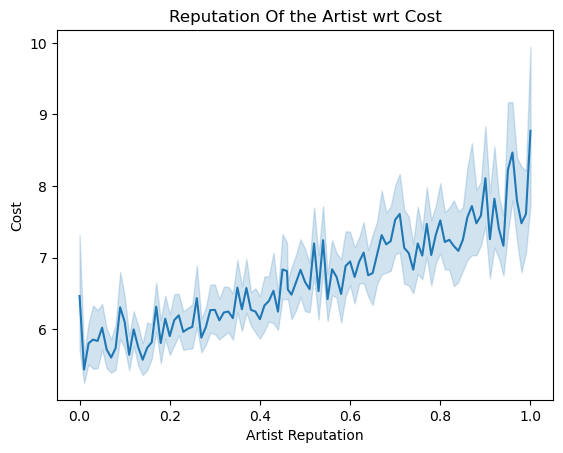

In [15]:
sns.lineplot(x="Artist Reputation", y="Cost", data=df) 
  
# setting the title using Matplotlib
plt.title('Reputation Of the Artist wrt Cost')
  
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Brass'),
  Text(1, 0, 'Clay'),
  Text(2, 0, 'Aluminium'),
  Text(3, 0, 'Wood'),
  Text(4, 0, 'Marble'),
  Text(5, 0, 'Bronze'),
  Text(6, 0, 'Stone'),
  Text(7, 0, 'No Material')])

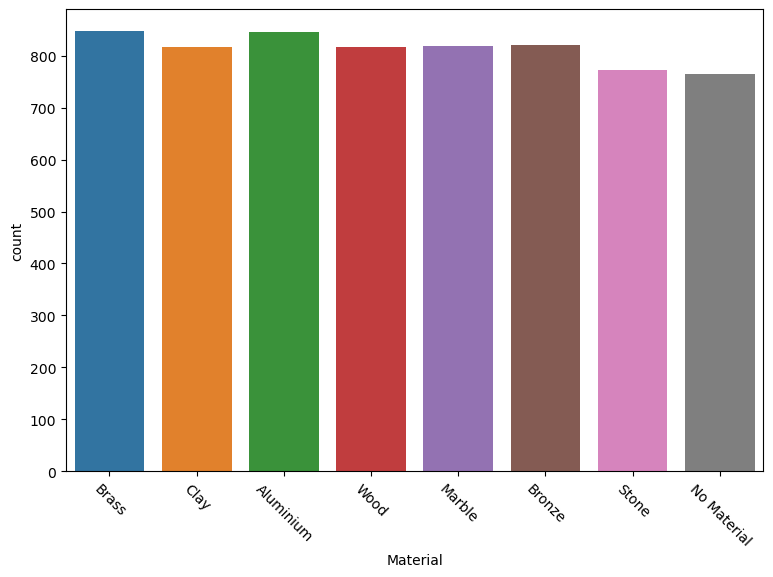

In [16]:
# Count Plot (a.k.a. Bar Plot)
plt.figure(figsize=(9,6))
sns.countplot(x='Material', data=df)
 
# Rotate x-labels
plt.xticks(rotation=-45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, ' OH'),
  Text(1, 0, ' WY'),
  Text(2, 0, ' WA'),
  Text(3, 0, ' KY'),
  Text(4, 0, ' PA'),
  Text(5, 0, ' AL'),
  Text(6, 0, ' WV'),
  Text(7, 0, ' CA'),
  Text(8, 0, ' ND'),
  Text(9, 0, ' GA'),
  Text(10, 0, ' DC'),
  Text(11, 0, ' TX'),
  Text(12, 0, ' CO'),
  Text(13, 0, 'AE'),
  Text(14, 0, ' OR'),
  Text(15, 0, ' MI'),
  Text(16, 0, ' NM'),
  Text(17, 0, ' AR'),
  Text(18, 0, 'AP'),
  Text(19, 0, ' VT'),
  Text(20, 0, ' IA'),
  Text(21, 0, ' MN'),
  Text(22, 0, ' NH'),
  Text(23, 0, ' SC'),
  Text(24, 0, 'AA'),
  Text(25, 0, ' OK'),
  Text(26, 0, ' HI'),
  Text(27, 0, ' RI'),
  Text(28, 0, ' LA'),
  Text(29, 0, ' DE'),
  Text(30, 0, ' ID'),
  Text(31, 0, ' CT'),
  Text(32, 0, ' MS'),
  Text(33, 0, ' FL'),
  Text(34, 0, '

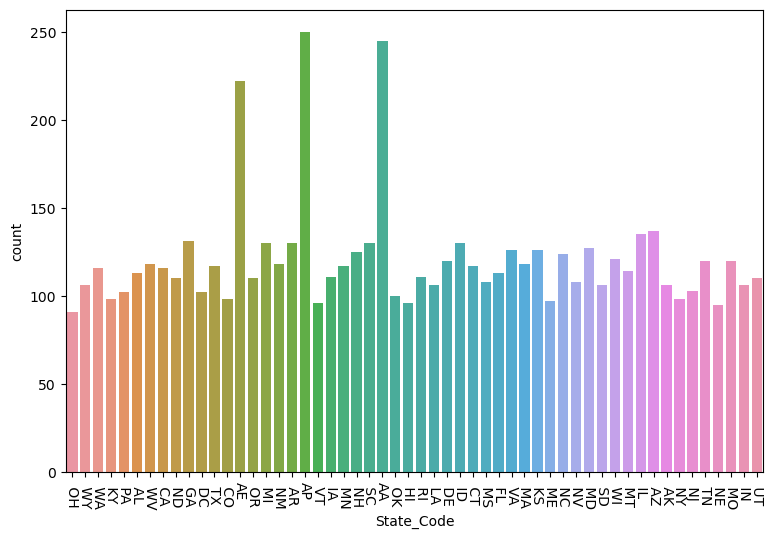

In [17]:
plt.figure(figsize=(9,6))
sns.countplot(x='State_Code', data=df)
 
# Rotate x-labels
plt.xticks(rotation=-90)

In [18]:
df.drop(['Customer Location'], axis = 1, inplace = True)


In [19]:
df.dtypes

Artist Reputation        float64
Height                   float64
Width                    float64
Weight                   float64
Material                  object
Price Of Sculpture       float64
Base Shipping Price      float64
International             object
Express Shipment          object
Installation Included     object
Transport                 object
Fragile                   object
Customer Information       int64
Remote Location           object
Cost                     float64
Scheduled_month            int64
Delivery_month             int64
Scheduled_day              int64
Delivery_day               int64
Scheduled_Year             int64
Delivery_Year              int64
State_Code                object
dtype: object

In [20]:
df.corr()

,Artist Reputation,Height,Width,Weight,Price Of Sculpture,Base Shipping Price,Customer Information,Cost,Scheduled_month,Delivery_month,Scheduled_day,Delivery_day,Scheduled_Year,Delivery_Year
Artist Reputation,1.000000,-0.000474,-0.008324,0.015529,0.047284,-0.011136,0.009263,0.327207,0.013776,0.015747,-0.012303,-0.010810,0.002174,0.001759
Height,-0.000474,1.000000,0.709725,0.213494,0.185964,0.343044,-0.010168,0.455001,-0.001320,-0.000196,0.012349,0.007532,-0.007706,-0.007908
Width,-0.008324,0.709725,1.000000,0.311684,0.289479,0.316333,-0.005486,0.454665,0.011388,0.013084,0.007389,0.011178,-0.006568,-0.006973
Weight,0.015529,0.213494,0.311684,1.000000,0.873325,0.144100,-0.010740,0.437483,-0.012554,-0.012552,-0.001930,0.008295,0.005032,0.004942
Price Of Sculpture,0.047284,0.185964,0.289479,0.873325,1.000000,0.134407,-0.008826,0.447069,-0.008384,-0.008763,-0.001185,0.009839,0.007851,0.007816
Base Shipping Price,-0.011136,0.343044,0.316333,0.144100,0.134407,1.000000,-0.002095,0.609069,0.001214,0.002323,0.005377,-0.001737,-0.006344,-0.006407
Customer Information,0.009263,-0.010168,-0.005486,-0.010740,-0.008826,-0.002095,1.000000,0.052469,-0.031819,-0.030597,0.017705,-0.007693,0.002077,0.002202
Cost,0.327207,0.455001,0.454665,0.437483,0.447069,0.609069,0.052469,1.000000,0.003330,0.004132,0.011828,0.012774,0.000422,0.000124
Scheduled_month,0.013776,-0.001320,0.011388,-0.012554,-0.008384,0.001214,-0.031819,0.003330,1.000000,0.979829,0.019262,0.018603,-0.107934,-0.103886
Delivery_month,0.015747,-0.000196,0.013084,-0.012552,-0.008763,0.002323,-0.030597,0.004132,0.979829,1.000000,0.026833,0.011285,-0.099371,-0.103462


<AxesSubplot:>

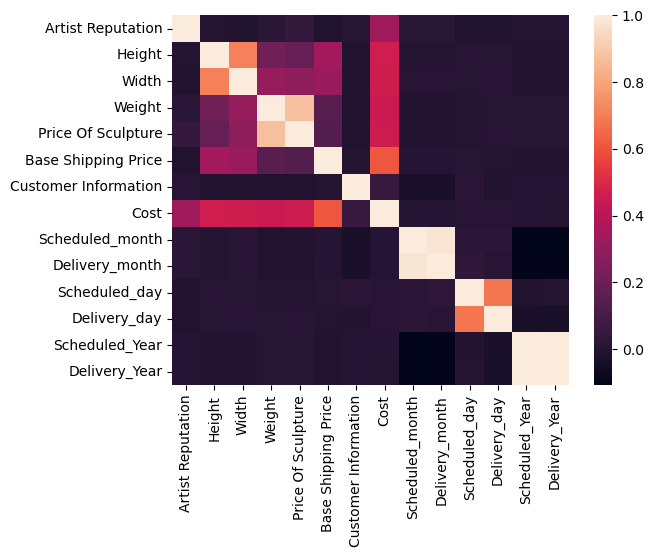

In [21]:
# calculate the correlation matrix
corr = df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [22]:
df.head(2)

,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Cost,Scheduled_month,Delivery_month,Scheduled_day,Delivery_day,Scheduled_Year,Delivery_Year,State_Code
0,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,1,No,5.646471,6,6,7,3,2015,2015,OH
1,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,1,No,5.074924,3,3,6,5,2017,2017,WY


In [23]:
fig = px.strip(df, x="Height", y="Cost", orientation="h")
fig.show()

Not much relationship between height and cost of sculpture.

In [24]:
fig = px.strip(df, x="Weight", y="Cost", orientation="h")
fig.show()

- If the weight is more , it is quite possible that it is of high cost

In [25]:
df.head(2)

,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Cost,Scheduled_month,Delivery_month,Scheduled_day,Delivery_day,Scheduled_Year,Delivery_Year,State_Code
0,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,1,No,5.646471,6,6,7,3,2015,2015,OH
1,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,1,No,5.074924,3,3,6,5,2017,2017,WY


In [26]:
fig = px.pie(df, values='Cost', names='Transport', title='Mode of transportation Cost Distribution')
fig.show()

In [27]:
fig = px.pie(df, values='Cost', names='Installation Included', title='Installation Included Cost Distribution')
fig.show()

In [28]:
fig = px.pie(df, values='Cost', names='State_Code', title='State Wise Cost Distribution')
fig.show()

In [29]:
fig = px.pie(df, values='Cost', names='Delivery_day', title='Delivery Day Cost Distribution')
fig.show()

Doesn't matter much on the delivery day.

In [30]:
fig = px.pie(df, values='Cost', names='Scheduled_day', title='Scheduled Day Cost Distribution')
fig.show()

Same for scheduled day.

In [31]:
df.head()

,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Cost,Scheduled_month,Delivery_month,Scheduled_day,Delivery_day,Scheduled_Year,Delivery_Year,State_Code
0,0.26,17.0,6.000000,4128.000000,Brass,13.91,16.27,Yes,Yes,No,Airways,No,1,No,5.646471,6,6,7,3,2015,2015,OH
1,0.28,3.0,3.000000,61.000000,Brass,6.83,15.00,No,No,No,Roadways,No,1,No,5.074924,3,3,6,5,2017,2017,WY
2,0.07,8.0,5.000000,237.000000,Clay,4.96,21.18,No,No,No,Roadways,Yes,1,Yes,5.038834,3,3,9,8,2015,2015,WA
3,0.12,9.0,9.617647,400694.821918,Aluminium,5.81,16.31,No,No,No,Missing_Transport,No,2,Yes,5.082398,5,5,24,20,2015,2015,KY
4,0.15,17.0,6.000000,324.000000,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,1,No,5.070350,12,12,18,14,2016,2016,PA


In [32]:
# df_new_grouped = df_new_grouped.groupby(['oyo_id','date_add','hub_name','Final_Status'],as_index = False)['booking_id'].nunique()
# df1_grouped = df1.groupby(['hub_name','date_add','Final_Status'], as_index= False)['T_Count'].sum()


Some grouping of features

In [33]:
df_material_group = df.groupby(['Material'],as_index = False)['Height','Weight','Price Of Sculpture','Base Shipping Price','Cost'].sum()
df_material_group

,Material,Height,Weight,Price Of Sculpture,Base Shipping Price,Cost
0,Aluminium,18651.544000,2.350531e+07,5.759140e+03,16535.02,4783.495931
1,Brass,18265.777796,5.196345e+07,7.607590e+04,38757.83,5572.038761
2,Bronze,18159.648163,4.578723e+07,4.116043e+04,33564.23,5195.436524
3,Clay,17630.180571,3.100285e+07,9.750970e+03,21846.56,4848.199177
4,Marble,17426.284735,5.968643e+08,2.012473e+06,44678.57,6384.995925
5,No Material,16421.997714,2.725245e+08,6.998321e+05,28296.38,5030.006151
6,Stone,16696.180571,1.557326e+09,4.901568e+06,45073.40,6542.288054
7,Wood,18228.712980,2.554263e+07,4.110680e+03,14394.64,4498.347932


Stone has height and weight in lower side and Shipping Price and Cost Price on the higher side

In [34]:
df_transport_group = df.groupby(['Transport'],as_index = False)['Height','Weight','Price Of Sculpture','Base Shipping Price','Cost'].sum()
df_transport_group

,Transport,Height,Weight,Price Of Sculpture,Base Shipping Price,Cost
0,Airways,39203.361143,7.274085e+08,2.214503e+06,67902.57,12171.613790
1,Missing_Transport,30387.243102,6.599466e+08,1.727468e+06,52840.17,9254.543665
2,Roadways,44741.750041,8.286330e+08,2.637011e+06,77798.13,13568.853549
3,Waterways,27147.972245,3.885282e+08,1.171749e+06,44605.76,7859.797451
